# Basic Vector Operations

<style> p { text-align: justify; } </style>

Vector data is a fundamental type of geospatial data that represents geographic features as points, lines, or polygons. Each feature is associated with attributes, making it possible to store and analyze spatial and non-spatial data together. In this chapter, you'll learn how to perform basic operations on vector data using Python, including reading data, inspecting it, filtering, and performing basic transformations.

We'll use the `GeoPandas` library for these operations, which simplifies working with vector data in Python. GeoPandas extends pandas to handle spatial data and integrates seamlessly with libraries like matplotlib for visualization.

## Loading and Inspecting

`GeoPandas` allows you to read vector data formats such as Shapefiles, GeoJSON, or GeoPackages. Here's how you can load a GeoPackage file:

In [2]:
import geopandas as gpd 

# Load a geopackage file
file_path = "data/vector/kanchanpur.gpkg"
vector_data = gpd.read_file(file_path)

# View the first few rows
print(vector_data.head())

           NAME                                           geometry
0  BaisiBichawa  MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...
1      Beldandi  MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...
2      Chandani  MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...
3        Daijee  MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...
4   Dekhatbhuli  MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...


- The `read_file()` function reads the vector data and returns a GeoDataFrame.
- You can inspect the structure of the data using `.head()`, which displays the first few rows.

Once the data is loaded, it's essential to understand its structure and content. GeoPandas provides useful attributes and methods for this purpose.

In [3]:
# Check the geometry column
print(vector_data.geometry.head())

# Display the column names
print(vector_data.columns)

# Check the Coordinate Reference System (CRS)
print(vector_data.crs)

0    MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...
1    MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...
2    MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...
3    MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...
4    MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...
Name: geometry, dtype: geometry
Index(['NAME', 'geometry'], dtype='object')
EPSG:4326


- `Geometry Column`: Contains the spatial features (e.g., points, lines, polygons).
- `Attributes`: Columns other than the geometry represent non-spatial data (e.g., population, area).
- `CRS`: The Coordinate Reference System defines how the data is projected on the Earth's surface.

## Subsetting

Subsetting involves selecting a subset of features based on specific conditions or attributes. You can subset vector data using boolean expressions on columns or spatial conditions.

### Subsetting Based on Attribute

For example, let's subset the data to select only features where the Name attribute is "Sreepur".

       NAME                                           geometry
18  Sreepur  MULTIPOLYGON (((80.34809 28.73316, 80.3589 28....


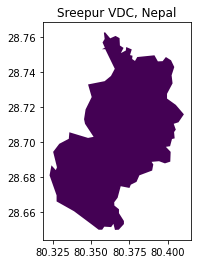

In [4]:
# Subset "Sreepur" data
sreepur_data = vector_data[vector_data['NAME'] == 'Sreepur']

# View the subset
print(sreepur_data.head())

# Plot the subsetted data
import matplotlib.pyplot as plt

sreepur_data.plot(column='NAME', cmap='viridis', legend=False)
plt.title("Sreepur VDC, Nepal")
plt.show()


### Subsetting Based on Spatial Location

You can also subset data based on spatial relationships, such as features that lie within a certain bounding box.

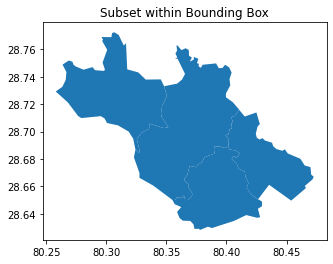

In [5]:
# Define a bounding box (minx, miny, maxx, maxy)
bbox = (80.3, 28.6, 80.4, 28.7)

# Subset data within the bounding box
bbox_data = vector_data.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]

# Plot the subsetted data
bbox_data.plot()
plt.title("Subset within Bounding Box")
plt.show()

## Spatial Transformations

Spatial transformations modify the geometry of features. Common transformations include creating buffers and reprojecting the data to a new CRS.

### Reprojecting

To reproject data into a new CRS, use the `.to_crs()` method. Since, the vector data we are using here in this tutorial lies in UTM zone 45N as per projected CRS, we will use the corresponding EPSG code i.e. 32645.

In [6]:
# Reproject to UTM 45N (EPSG:32645)
reprojected_data = sreepur_data.to_crs(epsg=32645)

# Check the new CRS
print(reprojected_data.crs)

epsg:32645


### Buffering features

The buffer operation creates a zone around a feature at a specified distance. It is often used for proximity analysis, such as determining areas within a certain distance of a road or river.

<Axes: >

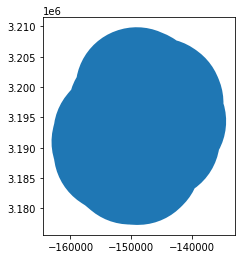

In [7]:
# Create a 10-kilometers buffer around Sreepur
buffered_data = reprojected_data.copy()
buffered_data['geometry'] = reprojected_data.geometry.buffer(10000)

# Plot the buffered data
buffered_data.plot()

## Intersection

The intersection operation allows you to find spatial relationships between two layers of vector data. This can be helpful for tasks like finding the overlap between two polygons, or identifying which features from one layer intersect with another.

Here, we have two GeoDataFrames: one representing administrative boundaries and another representing protected areas. To find areas where protected areas and administrative boundaries overlap:

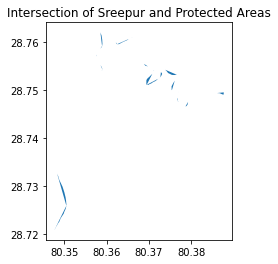

    NAME_1       WDPAID                     NAME_2
0  Sreepur  555569941.0  Suklaphanta - Buffer Zone


In [8]:
# Load protected areas GeoDataFrame
wdpa_data = gpd.read_file("data/vector/protected_areas.gpkg")

# Perform the intersection
intersection = gpd.overlay(sreepur_data, wdpa_data, how='intersection')

# Plot the intersection
intersection.plot()
plt.title("Intersection of Sreepur and Protected Areas")
plt.show()

# View the result
print(intersection.iloc[:, [0, 1, 4]].head(1)) # only view important columns

- `:` selects all rows.
- `[0, 1, 4]` selects the first, second and fifth columns (indexed starting at 0).
- `.head()` limits the output to the first few rows.

## Area Computation

One of the fundamental operations in geospatial analysis is calculating the area of features. This is particularly useful for tasks like land cover analysis, urban planning, or environmental studies.

To compute the area of each feature in a GeoDataFrame, you can use the `.area` property. GeoPandas calculates the area of each feature in its native CRS. Here in this section, we will compute the area of Kanchanpur district.

In [9]:
# Ensure that the CRS is in a projected coordinate system (not WGS84)
# This step is important for accurate area calculations
projected_data = vector_data.to_crs(epsg=32645)  # UTM Zone 45N

# Calculate area for each feature (in square meters)
projected_data['area'] = projected_data.geometry.area

# Display the area of the first few features
print(projected_data[['NAME', 'area']].head())

           NAME          area
0  BaisiBichawa  7.447664e+07
1      Beldandi  2.490623e+07
2      Chandani  3.251720e+07
3        Daijee  1.028231e+08
4   Dekhatbhuli  9.110952e+07


Since, there are 21 VDCs in kanchanpur district, we got the area of each polygons. Let's compute the total area of kanchanpur district using sum() function

In [10]:
# Compute the total area (sum of all feature areas)
total_area = projected_data['area'].sum()

# Convert total area to square kilometers
total_area_sqkm = total_area / 1_000_000

# Print the total area
print(f"Total Area: {total_area_sqkm:.2f} square kilometers")

Total Area: 1633.44 square kilometers


- `.sum()` method computes the total area by summing up the area column.
- `:.2f` format ensures the total area is displayed with two decimal places.

## Other basic Operations

In addition to above-mentioned operations, here are other basic vector operations commonly used in geospatial analysis with Python:

### Union

The union operation combines the geometries of two layers, merging their features into a new dataset. We already have Sreepur gpkg loaded, lets subset one more polygon from kanchanpur district.

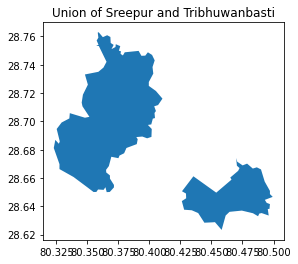

In [11]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) # only use if the warnings persist but do not affect the outcome

# subset polygon with Name: Tribhuwanbasti
tribhuwan_data = vector_data[vector_data['NAME'] == 'Tribhuwanbasti']

# Perform a union of two GeoDataFrames
union_data = gpd.overlay(sreepur_data, tribhuwan_data, how='union')

# Plot the result
union_data.plot()
plt.title("Union of Sreepur and Tribhuwanbasti")
plt.show()

### Difference

To compute the difference between two geometries, i.e., what's left in one geometry after subtracting the other, you can use the `difference()` method in GeoPandas. This operation is commonly used to subtract one geometry from another, leaving behind the part of the geometry that doesn't overlap.

In GeoPandas, the difference() method computes the geometric difference between two geometries. For example, if you want to subtract one GeoDataFrame from another (like subtracting `union_data` from `vector_data`), this operation will return the parts of the features in vector_data that don't overlap with union_data.

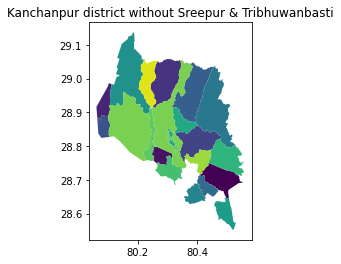

In [12]:
# Perform the difference operation: subtract union_data from vector_data
difference_data = vector_data.copy()
difference_data['geometry'] = vector_data.geometry.difference(union_data.geometry.union_all())

# Plot the result to visualize the difference
difference_data.plot(column='NAME', cmap='viridis', legend=False)
plt.title("Kanchanpur district without Sreepur & Tribhuwanbasti")
plt.show()

### Centroid Calculation

The centroid of a geometry is its geometric center, calculated as the average of all the coordinates that make up the geometry. For simple polygons, the centroid is a single point located at the center of the shape. For more complex geometries (e.g., multipolygons), the centroid is computed as the weighted average of the centroids of the individual components.

In GeoPandas, you can compute the centroid of each geometry in a GeoDataFrame using the `.centroid` property. This will return a `GeoSeries` containing the centroid points of each feature in the dataset.

           NAME                         centroid
0  BaisiBichawa  POINT (-137555.696 3192679.125)
1      Beldandi  POINT (-156987.271 3201268.096)
2      Chandani  POINT (-174638.775 3219491.528)
3        Daijee  POINT (-154059.255 3226100.973)
4   Dekhatbhuli  POINT (-144763.595 3205263.406)


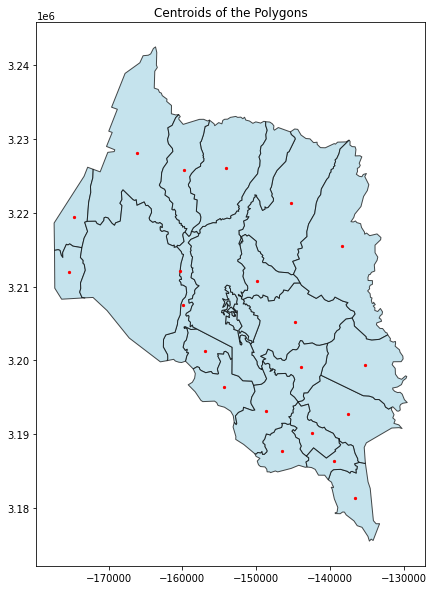

In [14]:
# Calculate the centroids of Kanchanpur district polygon
vector_data = vector_data.to_crs(epsg=32645)

# It’s crucial to use a projected CRS (rather than a geographic CRS) when calculating centroids for accuracy
vector_data['centroid'] = vector_data.geometry.centroid

# View the centroids
print(vector_data[['NAME', 'centroid']].head())

# Plot the original geometries and their centroids
fig, ax = plt.subplots(figsize=(10, 10))
vector_data.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.7)
vector_data['centroid'].plot(ax=ax, color='red', marker='o', markersize=5)
plt.title("Centroids of the Polygons")
plt.show()

### Bounding Box

A bounding box is the smallest rectangle that can entirely enclose a geometry. This rectangle is aligned with the coordinate axes and is defined by the minimum and maximum coordinates along the x and y axes. It can be useful for tasks like spatial indexing, collision detection, or quickly determining the spatial extent of a geometry.

In `GeoPandas`, you can extract the bounding box of a geometry using the .bounds attribute. This attribute returns a tuple of four values: `(minx, miny, maxx, maxy)` representing the coordinates of the bounding box.

In [80]:
# Extract the bounding box of each geometry
sreepur_data[['minx', 'miny', 'maxx', 'maxy']] = sreepur_data.geometry.bounds

# View the bounding box coordinates
print(sreepur_data[['minx', 'miny', 'maxx', 'maxy']].head())

        minx       miny       maxx       maxy
18  80.32299  28.650024  80.410477  28.762989


### Length Computation

The length of a geometry refers to the total length of the boundary or edges of the geometry. For line geometries (e.g., `LineString`), the length is the total distance along the path of the line. For polygon geometries (e.g., `Polygon`), the length refers to the perimeter (the total distance around the boundary of the shape).

In GeoPandas, you can calculate the length of a geometry using the `.length` property. This method computes the length of the geometries in the coordinate reference system (CRS) of the input data.

In [81]:
# Calculate the length for each geometry
vector_data['length'] = vector_data.geometry.length

# View the calculated lengths
print(vector_data[['NAME', 'length']].head())

           NAME        length
0  BaisiBichawa  43844.025350
1      Beldandi  26217.979491
2      Chandani  30474.496620
3        Daijee  49923.088349
4   Dekhatbhuli  55848.465579


### Distance Calculation

In GeoPandas, you can calculate the distance between two Polygon geometries using the `.distance()` method. The method calculates the shortest distance between the boundaries of the two polygons. If the two polygons do not intersect, this distance is the shortest distance between their boundaries. If the polygons do intersect, the distance is zero.

Here in this tutorial, we will compute the distance between two VDCs of Kanchanpur district: Sreepur and tribhuwanbasti.

In [86]:
# Reproject both geometries to a projected CRS (e.g., EPSG:3395 for meters)
sreepur_data_projected = sreepur_data.to_crs(epsg=32645)
tribhuwanbasti_projected = tribhuwan_data.to_crs(epsg=32645)

# Compute the distance between the two polygons
distance = sreepur_data_projected.geometry.distance(tribhuwan_data_projected.geometry.iloc[0]).min()

# Output the calculated distance
print(f"Distance between Sreepur and Tribhuwanbasti is: {distance:.2f} meters")

Distance between Sreepur and Tribhuwanbasti is: 4541.37 meters


### Saving Data to File

To save a vector data (GeoDataFrame) to a file, GeoPandas provides methods to save data in various formats, such as Shapefile, GeoJSON, GPKG (GeoPackage), and others. However, we will be saving vector data as `.gpkg` since it is a great choice for storing multiple layers (tables) in a single file. GeoPackage (.gpkg) is a flexible and efficient format for storing geospatial data. 

In [87]:
# Save to GeoPackage 
# Remove '#' from the script below and provide the path where you want to save your .gpkg file
# vector_data.to_file("path_to_output_file.gpkg", driver="GPKG")

**For this tutorial, this concludes the coverage of vector data operations. If you would like to explore additional operations, examples, or need clarification on any of the steps covered, please visit the GitHub repository: [Python_tutorial](https://github.com/Ohm-Np/Python_tutorial) and feel free to open an issue.**